Mean Squared Error: 0.019855225800557392


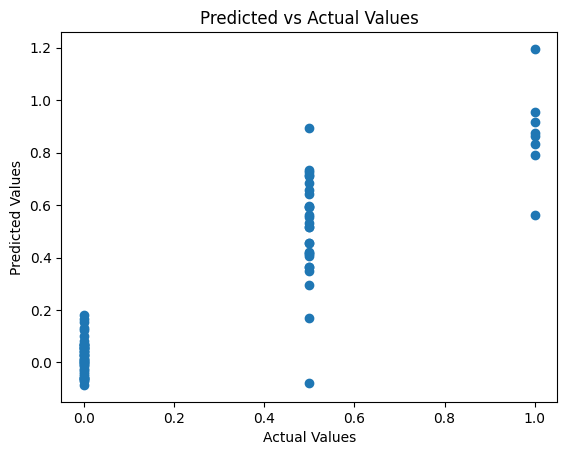

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('augmented_dementia_dataset.csv')

# to separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64'])
numeric_cols.fillna(numeric_cols.mean(), inplace=True)

df = pd.concat([non_numeric_cols, numeric_cols], axis=1)
df = pd.get_dummies(df, columns=['Group', 'M/F'])

# CDR assuming target
X = df.drop(['Subject ID', 'MRI ID', 'Hand', 'CDR'], axis=1)  # dropping non-numeric columns (error)
y = df['CDR']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create + training
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# predictions
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dementia_dataset.csv')

# Handling missing values (example: mean imputation)
df.fillna(df.mean(), inplace=True)

# Encoding categorical variables (if any)
# Adjust column names as per your dataset
categorical_features = ['your_categorical_column']
df = pd.get_dummies(df, columns=categorical_features)

# Splitting the data into features and target
X = df.drop('target_column', axis=1)  # replace 'target_column' with your target column name
y = df['target_column']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the neural network
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting predictions vs actual values (optional)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()
